<a href="https://colab.research.google.com/github/zakariDS/portfolio/blob/main/TA_congestion_transition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>Project Overview</b>

The degree at which regional traffic congestion changes from one state to the other is of key importance to policy planners in forecasting future state of congestion. This analysis was carried out for freeway traffic congestion and the purpose was to understand the likelihood of reaching Light congestion (free-flow) from moderate and heavy congestion levels. 


<b>Project Goals</b>

The purpose of this project was to model the rate at which congestion moves from one state to the other so policy makers can design specific policies targeted at specific locations with the aim of reducing congestion to tolerable limits.

<b>Outcomes</b>

The data covers 2012 and 2018 monthly congestion categorized as being either Light, Moderate or Heavy. This analysis was undertaken with R’s markovchain package and assumes congestion starts initially in a given category and then takes a move to another category, continuing to do so until reaching Light (free-flow). The model further assumes that at each move (transition), congestion is independent of the past level. 

I found that although evening peak period congestion accounted for 70% of total congestion, the rate of return to free-flow condition was faster in the evening than in the morning peak periods.

<b>Project Status:</b> Completed (2018)

<b>Report:</b> Page 36
https://www.ewgateway.org/wp-content/uploads/2020/03/2018-AnnualRegionalCongestion-Rpt.pdf



In [2]:
#install.packages("markovchain")
#install.packages("diagram")
library(markovchain)
library(diagram)

si 
 A  2 - dimensional discrete Markov Chain defined by the following states: 
  light ,  moderate  
 The transition matrix  (by rows)  is defined as follows: 
              light   moderate 
 light     0.9746835 0.02531646
 moderate  0.7500000 0.25000000


light,moderate
0.9673469,0.03265306


,Heavy,Light,Moderate
Heavy,0.0,80.0,20.0
Light,1.2,95.2,3.6
Moderate,0.0,81.0,19.0


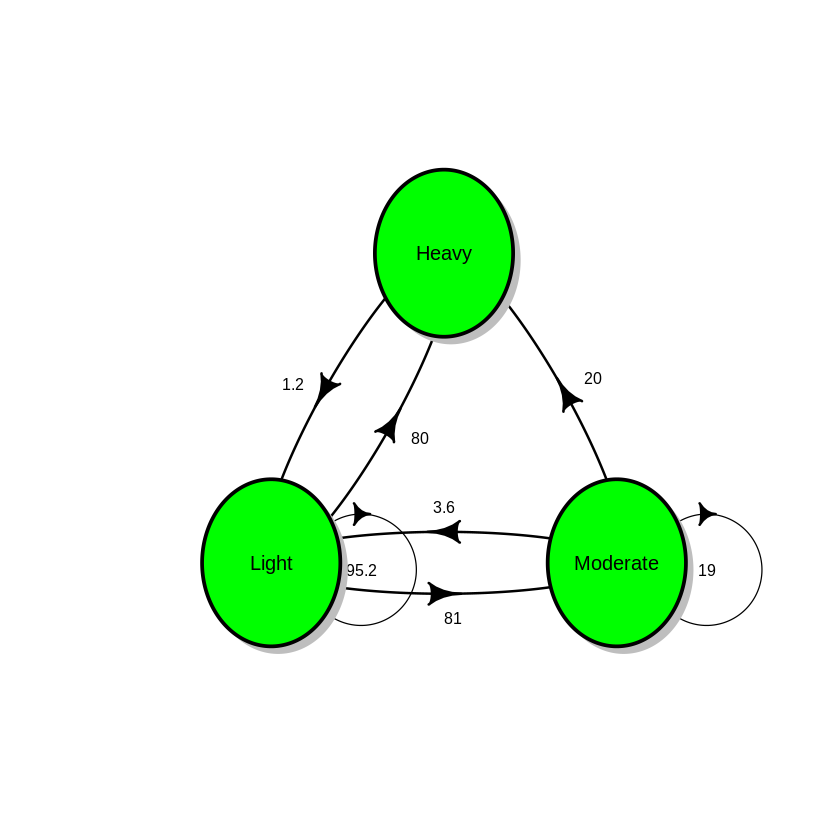

In [3]:
tti1 <- read.csv("/content/sample_data/febam.csv")
tti1 <- markovchainFit(tti1$tti1,name = "si")$estimate
tti1
steadyStates(tti1)
stateNames <- c("Heavy","Light","Moderate")
tti5 <- matrix(
  c(0,80,20,1.2,95.2,3.6,0,81,19),
  nrow=3, byrow=TRUE)
row.names(tti5) <- stateNames; colnames(tti5) <- stateNames
tti5
pos1 <- cbind (
  c(0,80,20,1.2,95.2,3.6,0,81,19))
plotmat(tti5,pos = c(1,2),
        lwd = 2, box.lwd = 3,
        cex.txt = 0.8,
        box.size = 0.1,
        box.type = "ellipse",
        box.prop = 1.2,
        box.col = "green",
        arr.length=.5,
        arr.width=.3,
        self.cex = .8,
        self.shifty = -.01,
        self.shiftx = .13,
        main = "")